# Install and Import Dependencies


In [2]:
#import libraries
import pandas as pd
import numpy as np
import xlrd
import os
import warnings;
warnings.simplefilter("ignore")
from fbprophet import Prophet
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


# Read in Data and Process Data

In [3]:
# download Data
rcParams["figure.figsize"] = 20,20

def parser(x):
    return datetime.strptime(x, "%m/%d/%y")

df = pd.read_excel(
     os.path.join("test.xlsx"),sheet_name="Data", engine='openpyxl', parse_dates=[0], date_parser = parser
)



In [4]:
df.rename(columns= {"Entered on": "ds", "Resolution Time": "y"}, inplace= True )
df.drop(["Severity",'Case ID', "Status","Total" ],axis = 1, inplace =True)
df = df.groupby(["ds"], as_index = False).mean()
df = df.fillna(0)

### Case Count Prediction

#### model_0 

After Data Preperations we can built first model for the 1st Application

In [4]:
#our filter is App Gr "ACESFW" which has index 0
model_0 = df

# Train Model

#### train_model_0

In [83]:
#building Ml Model - PROPHET
m = Prophet(interval_width=0.95, yearly_seasonality=True, changepoint_range=1, 
            changepoint_prior_scale=0.05)
model0 = m.fit(model_0)
#red sign indicates that there are too little variables

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecast Away

,ds,yhat
0,2016-09-12,29.363192
1,2016-09-14,29.485468
2,2016-09-20,23.904791
3,2016-09-30,26.479463
4,2016-10-07,28.235135
...,...,...
792,2021-07-30,10.658769
793,2021-07-31,3.238092
794,2021-08-31,12.592246
795,2021-09-30,14.912739


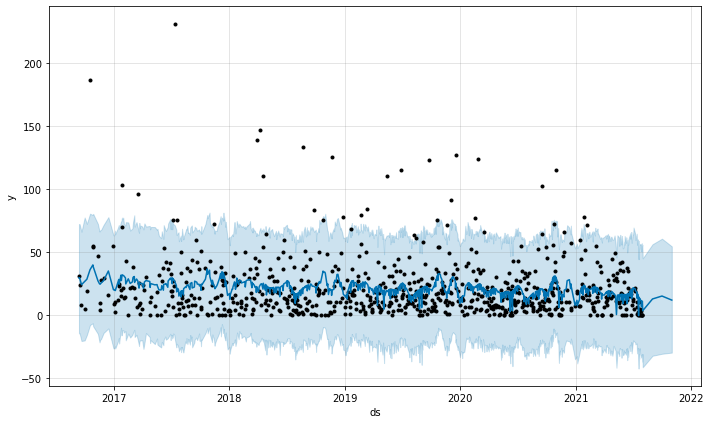

In [84]:
future0 = m.make_future_dataframe(periods=4, freq='M')
forecast0 = m.predict(future0)
fig = m.plot(forecast0)
forecast0[["ds","yhat"]]
# from fbprophet.plot import add_changepoints_to_plot
# a = add_changepoints_to_plot(fig.gca(),m,forecast0)


In [ ]:
#pull out excel file and make a dashboard in excel
df_final.to_excel("Results.xlsx")